In [1]:
# !pip install netCDF4
# !pip install basemap

---

---

---

---

#EX1 (3 points):


**ENSO**

We have an index called Nino3.4 that quantifies ENSO (El Niño-Southern Oscillation).
Nino3.4 is calculated using SST (sea surface temperature) anomalies averged over the area from 5S-5N and 170-120W in the Tropical Pacific.

***Nino3.4 of a month = Area average over [5S-5N and 170-120W] of (SST of this month minus mean SST over a long period (e.g. 30 years))***

When it is large and positive, we say there is an El Nino. When it is large and negative, we say there is a La Nina. In between, we say it is neutral.

**SST**

We will use the SST Monthly Data located in: https://drive.google.com/file/d/10vJE9bbwkPCqjLtZNTC0nPQ7IPgtNJjy/view?usp=share_link

**Defining El Nino, La Nina, and Neutral**

Nino3.4 >= 1 -> El Nino

Nino3.4 <= -1 -> La Nina

Nino3.4 > -1 and Nino3.4 < 1 -> Neutral



Draw the Nino3.4 index.

![link text](https://i.imgur.com/aVO5dz2.png)

In [2]:
#----#----#----#----#----#----#
# EX1: PUT YOUR CODE HERE
#----#----#----#----#----#----#
from numpy import *
from netCDF4 import *

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm
import numpy as np
from netCDF4 import Dataset

nc_path = 'sst.nc'
nc_file = Dataset(nc_path, 'r')

for name in nc_file.variables.keys():
    if (name not in nc_file.dimensions.keys()):
        data = nc_file.variables[name]
        print(name, '\t',data.units, '\t\t',data.shape, '\t',data.dtype, '\t',data.dimensions)


# Retrieve time, lat, lon variables
time = nc_file.variables['time'][:]
lat = nc_file.variables['lat'][:]
lon = nc_file.variables['lon'][:]
sst = nc_file.variables['sst'][0, :, :]  # Selecting the first time step


# Print the variables to see their content
print("Time:", time)
print("Latitude:", lat)
print("Longitude:", lon)

sst 	 degC 		 (504, 72, 144) 	 float32 	 ('time', 'lat', 'lon')
Time: [66352. 66382. 66413. 66443. 66474. 66505. 66533. 66564. 66594. 66625.
 66655. 66686. 66717. 66747. 66778. 66808. 66839. 66870. 66898. 66929.
 66959. 66990. 67020. 67051. 67082. 67112. 67143. 67173. 67204. 67235.
 67264. 67295. 67325. 67356. 67386. 67417. 67448. 67478. 67509. 67539.
 67570. 67601. 67629. 67660. 67690. 67721. 67751. 67782. 67813. 67843.
 67874. 67904. 67935. 67966. 67994. 68025. 68055. 68086. 68116. 68147.
 68178. 68208. 68239. 68269. 68300. 68331. 68359. 68390. 68420. 68451.
 68481. 68512. 68543. 68573. 68604. 68634. 68665. 68696. 68725. 68756.
 68786. 68817. 68847. 68878. 68909. 68939. 68970. 69000. 69031. 69062.
 69090. 69121. 69151. 69182. 69212. 69243. 69274. 69304. 69335. 69365.
 69396. 69427. 69455. 69486. 69516. 69547. 69577. 69608. 69639. 69669.
 69700. 69730. 69761. 69792. 69820. 69851. 69881. 69912. 69942. 69973.
 70004. 70034. 70065. 70095. 70126. 70157. 70186. 70217. 70247. 70278.
 70308.

In [3]:
import os

# Define the file path
# nc_path = r'C:\Users\dangq\OneDrive\Máy tính\USTH\ICT\Data science\Data Visualization\Lab_5\sst.nc'
nc_path = 'sst.nc'
# Check if the file exists
if os.path.exists(nc_path):
    print("The file exists at:", os.path.abspath(nc_path))
else:
    print("The file does not exist. Please check the path.")

The file exists at: c:\Users\dangq\OneDrive\Máy tính\USTH\ICT\Data science\Data Visualization\Lab_5\sst.nc


In [4]:
# from netCDF4 import Dataset
# import numpy as np

# # Open the NetCDF file containing SST data
# nc_path = 'sst.nc'
# nc_file = Dataset(nc_path, 'r')

# # Retrieve the latitude, longitude, and SST variables
# lat = nc_file.variables['lat'][:]
# lon = nc_file.variables['lon'][:]
# sst = nc_file.variables['sst'][:]  # shape: (time, lat, lon)

# # Define the Niño 3.4 region boundaries in degrees East (0-360)
# lat_min = -5.0  # 5S
# lat_max = 5.0   # 5N
# lon_min = 360 - 170.0  # 170W
# lon_max = 360 - 120.0  # 120W

# def get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max):
#     """Calculate the mean SST in the specified region."""
#     lat_indices = np.where((lat >= lat_min) & (lat <= lat_max))[0]
#     lon_indices = np.where((lon >= lon_min) & (lon <= lon_max))[0]
#     return np.mean(sst[:, lat_indices, :][:, :, lon_indices], axis=(1, 2))

# def get_nino34_index(sst, lat, lon):
#     """Calculate the Niño 3.4 index from SST data."""
#     return get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max)

# # Calculate the climatological mean for the first 30 years (360 months)
# climatological_mean = np.mean(sst[:360, :, :], axis=0)

# # Calculate anomalies by subtracting the climatological mean
# sst_anomalies = sst - climatological_mean

# # Calculate the Niño 3.4 index (area-averaged SST anomaly over the Niño 3.4 region)
# nino3_4_index = get_nino34_index(sst_anomalies, lat, lon)

# # Print the Niño 3.4 index for each month
# print("Niño 3.4 Index:", nino3_4_index)

# # Close the NetCDF file
# nc_file.close()




from netCDF4 import Dataset
import numpy as np

# Open the NetCDF file containing SST data
nc_path = 'sst.nc'
nc_file = Dataset(nc_path, 'r')

# Retrieve the latitude, longitude, and SST variables
lat = nc_file.variables['lat'][:]
lon = nc_file.variables['lon'][:]
sst = nc_file.variables['sst'][:]  # shape: (time, lat, lon)

# Define the Niño 3.4 region boundaries in degrees East (0-360)
lat_min = -5.0  # 5S
lat_max = 5.0   # 5N
lon_min = 360 - 170.0  # 170W
lon_max = 360 - 120.0  # 120W

def get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max):
    """Calculate the mean SST in the specified region."""
    # Find the indices corresponding to the desired latitude and longitude range
    lat_indices = np.where((lat >= lat_min) & (lat <= lat_max))[0]
    lon_indices = np.where((lon >= lon_min) & (lon <= lon_max))[0]
    
    # Select the SST data in the specified region
    region_sst = sst[:, lat_indices, :][:, :, lon_indices]
    
    # Calculate the mean SST in the region, averaged over lat and lon
    return np.mean(region_sst, axis=(1, 2))

def calculate_monthly_climatology(sst):
    """Calculate the climatological mean for each month."""
    # Group data by month and calculate the mean
    monthly_climatology = np.zeros((12, sst.shape[1], sst.shape[2]))
    for month in range(12):
        # Select data for the current month (month+1 because months are 1-12)
        monthly_data = sst[month::12, :, :]
        # Calculate the mean for the current month
        monthly_climatology[month, :, :] = np.mean(monthly_data, axis=0)
    return monthly_climatology

# Calculate the monthly climatological mean
monthly_climatology = calculate_monthly_climatology(sst)

# Calculate anomalies by subtracting the monthly climatological mean
sst_anomalies = np.zeros_like(sst)
for month in range(12):
    # Apply the monthly mean subtraction for each month
    sst_anomalies[month::12, :, :] = sst[month::12, :, :] - monthly_climatology[month, :, :]

# Calculate the Niño 3.4 index (area-averaged SST anomaly over the Niño 3.4 region)
nino3_4_index = get_area_mean(sst_anomalies, lat, lon, lat_min, lat_max, lon_min, lon_max)

# Print the Niño 3.4 index for each month
print("Niño 3.4 Index:", nino3_4_index)

# Close the NetCDF file
nc_file.close()


Niño 3.4 Index: [-0.31917295001801993 -0.16434267589024135 -0.5472623734247117
 -0.3095856394086565 0.1892072700318836 -0.13656196140107654
 -0.07222303322383336 0.11353362174261183 0.5667145592825753
 0.7238839467366537 0.32731276466732934 0.9126613253638858
 1.3181190490722656 1.8996280488513766 1.8836798894973028
 2.360501243954613 2.3107537769135975 1.9537210010346913 1.390637988135928
 0.842881611415318 0.8077869415283203 0.550078346615746
 -0.32079596746535527 -0.4340417498633975 -0.3585867200578962
 -0.9920374552408854 -1.2399052211216517 -1.1330794379824685
 -0.9299557095482236 -0.10797030585152763 -0.4867293494088309
 -0.43444574446905226 -0.632419540768578 -1.024055662609282
 -0.6664698464529855 -0.5204657145908901 -0.3829994201660156
 -0.7019012087867373 -1.2495865594773066 -1.463062013898577
 -1.24687013171968 -0.8846421014694941 -0.8412448338099888
 -1.041094734555199 -1.0331981295631045 -1.0378125508626301
 -0.7777304876418341 -0.6242138544718424 -0.7657781328473773
 -0.6

In [5]:
# Classify the Nino3.4 index values
nino_classification = []

for index in nino3_4_index:
    if index >= 1:
        nino_classification.append("El Nino")
    elif index <= -1:
        nino_classification.append("La Nina")
    else:
        nino_classification.append("Neutral")

# Print the classification for each month
for month, classification in enumerate(nino_classification, 1):
    print(f"Month {month}: {classification}")


Month 1: Neutral
Month 2: Neutral
Month 3: Neutral
Month 4: Neutral
Month 5: Neutral
Month 6: Neutral
Month 7: Neutral
Month 8: Neutral
Month 9: Neutral
Month 10: Neutral
Month 11: Neutral
Month 12: Neutral
Month 13: El Nino
Month 14: El Nino
Month 15: El Nino
Month 16: El Nino
Month 17: El Nino
Month 18: El Nino
Month 19: El Nino
Month 20: Neutral
Month 21: Neutral
Month 22: Neutral
Month 23: Neutral
Month 24: Neutral
Month 25: Neutral
Month 26: Neutral
Month 27: La Nina
Month 28: La Nina
Month 29: Neutral
Month 30: Neutral
Month 31: Neutral
Month 32: Neutral
Month 33: Neutral
Month 34: La Nina
Month 35: Neutral
Month 36: Neutral
Month 37: Neutral
Month 38: Neutral
Month 39: La Nina
Month 40: La Nina
Month 41: La Nina
Month 42: Neutral
Month 43: Neutral
Month 44: La Nina
Month 45: La Nina
Month 46: La Nina
Month 47: Neutral
Month 48: Neutral
Month 49: Neutral
Month 50: Neutral
Month 51: Neutral
Month 52: Neutral
Month 53: Neutral
Month 54: Neutral
Month 55: Neutral
Month 56: Neutral
M

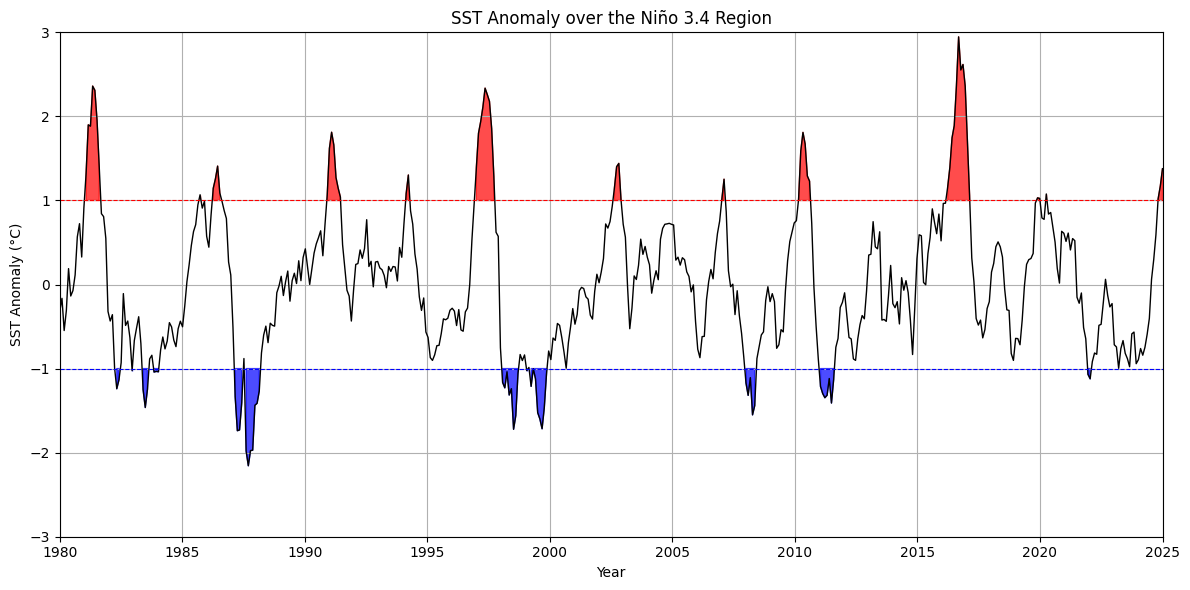

In [6]:
# Plotting the Nino 3.4 index
plt.figure(figsize=(12, 6))

# Set thresholds for El Nino and La Nina
el_nino_threshold = 1
la_nina_threshold = -1

# Create the x-axis values (assuming monthly data from some starting year)
years = np.linspace(1980, 2025, len(nino3_4_index))

# Plot the Nino 3.4 index line
plt.plot(years, nino3_4_index, color='black', linewidth=1)

# Add fill_between for El Nino and La Nina regions
plt.fill_between(years, el_nino_threshold, nino3_4_index, where=(nino3_4_index >= el_nino_threshold), color='red', alpha=0.7)
plt.fill_between(years, la_nina_threshold, nino3_4_index, where=(nino3_4_index <= la_nina_threshold), color='blue', alpha=0.7)

# Plot horizontal lines for thresholds
plt.axhline(y=el_nino_threshold, color='red', linestyle='--', linewidth=0.8)
plt.axhline(y=la_nina_threshold, color='blue', linestyle='--', linewidth=0.8)

# Set plot limits and labels
plt.xlim([years[0], years[-1]])
plt.ylim([-3, 3])
plt.title('SST Anomaly over the Niño 3.4 Region')
plt.xlabel('Year')
plt.ylabel('SST Anomaly (°C)')
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

Now, we would like to know more about the precipitation during the different ENSO phase.
# **Precipitation Data**

We will use the Global Precipitation Climatology Project (GPCP) Monthly Precipitation Data located in:

https://drive.google.com/file/d/10BO4_IqyBERHfWCSoBrL-y6nTpQJq-Sh/view?usp=share_link

Draw the precipitation anomaly during the different ENSO phase.
![link text](https://i.imgur.com/8nqwh1U.png)

In [31]:
#----#----#----#----#----#----#
# EX2: PUT YOUR CODE HERE
#----#----#----#----#----#----#

# ex2_path = 'precip.mon.mean.nc'
# ex2_file = Dataset(ex2_path, 'r')


from netCDF4 import Dataset, num2date
import numpy as np

# Open the 'sst.nc' NetCDF file
nc_path = 'sst.nc'
nc_file = Dataset(nc_path, 'r')

# Read the time variable and convert to datetime
time_var_sst = nc_file.variables['time']
time_units_sst = time_var_sst.units
time_calendar_sst = time_var_sst.calendar if hasattr(time_var_sst, 'calendar') else 'standard'
time_values_sst = num2date(time_var_sst[:], units=time_units_sst, calendar=time_calendar_sst)

# Convert to numpy array for easier comparison
time_values_sst = np.array(time_values_sst)

# Set the start and end time based on the first and last time in 'sst.nc'
start_time = time_values_sst[0]
end_time = time_values_sst[-1]

# Now, open the precipitation data file and filter it based on this time range
precip_file = 'precip.mon.mean.nc'
ds_precip = Dataset(precip_file, 'r')

# Read the precipitation time variable and convert to datetime
time_var_precip = ds_precip.variables['time']
time_units_precip = time_var_precip.units
time_calendar_precip = time_var_precip.calendar if hasattr(time_var_precip, 'calendar') else 'standard'
time_values_precip = num2date(time_var_precip[:], units=time_units_precip, calendar=time_calendar_precip)

# Convert precipitation time values to numpy array
time_values_precip = np.array(time_values_precip)

# Filter the time indices based on the range from 'sst.nc'
time_indices = np.where((time_values_precip >= start_time) & (time_values_precip <= end_time))[0]

# Slice the precipitation data using the filtered indices
precip_data = ds_precip.variables['precip'][time_indices, :, :]




In [28]:
# Count the occurrences of each classification
el_nino_count = nino_classification.count('El Nino')
la_nina_count = nino_classification.count('La Nina')
neutral_count = nino_classification.count('Neutral')

counts = [el_nino_count, la_nina_count, neutral_count]
print(counts)

[59, 51, 394]


Counts for each classification:
El Niño: 59
La Niña: 51
Neutral: 394
Total counts: [59, 51, 394]


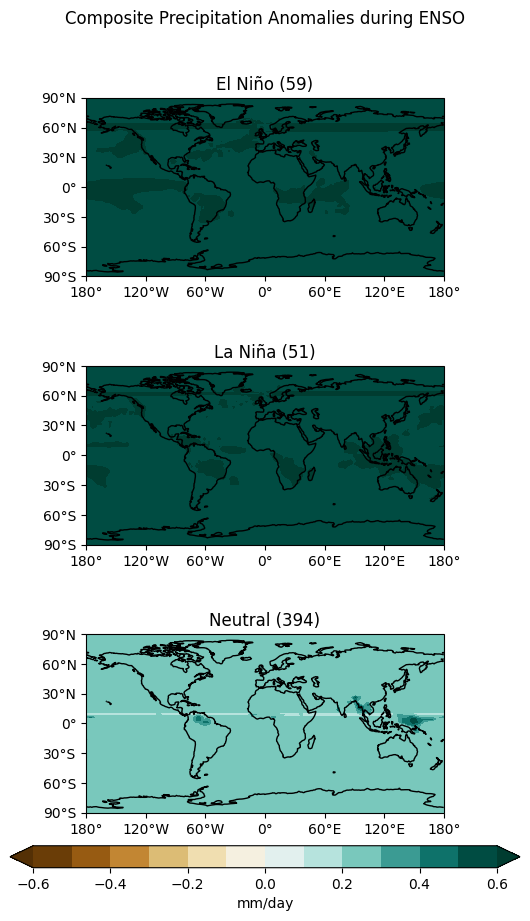

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import addcyclic
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from matplotlib.colors import Normalize

# Open the SST dataset
sst_path = 'sst.nc'
sst_dataset = Dataset(sst_path, 'r')

# Read the required variables from the SST dataset
sst = sst_dataset.variables['sst'][:]  # Assuming the variable name is 'sst'
lat = sst_dataset.variables['lat'][:]
lon = sst_dataset.variables['lon'][:]
time = sst_dataset.variables['time'][:]

# Define the Niño 3.4 region boundaries in degrees East (0-360)
lat_min = -5.0  # 5S
lat_max = 5.0   # 5N
lon_min = 360 - 170.0  # 170W
lon_max = 360 - 120.0  # 120W

def get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max):
    """Calculate the mean SST in the specified region."""
    # Find the indices corresponding to the desired latitude and longitude range
    lat_indices = np.where((lat >= lat_min) & (lat <= lat_max))[0]
    lon_indices = np.where((lon >= lon_min) & (lon <= lon_max))[0]
    
    # Select the SST data in the specified region
    region_sst = sst[:, lat_indices, :][:, :, lon_indices]
    
    # Calculate the mean SST in the region, averaged over lat and lon
    return np.mean(region_sst, axis=(1, 2))

def calculate_monthly_climatology(sst):
    """Calculate the climatological mean for each month."""
    # Group data by month and calculate the mean
    monthly_climatology = np.zeros((12, sst.shape[1], sst.shape[2]))
    for month in range(12):
        # Select data for the current month (month+1 because months are 1-12)
        monthly_data = sst[month::12, :, :]
        # Calculate the mean for the current month
        monthly_climatology[month, :, :] = np.mean(monthly_data, axis=0)
    return monthly_climatology

# Calculate the monthly climatological mean
monthly_climatology = calculate_monthly_climatology(sst)

# Calculate anomalies by subtracting the monthly climatological mean
sst_anomalies = np.zeros_like(sst)
for month in range(12):
    # Apply the monthly mean subtraction for each month
    sst_anomalies[month::12, :, :] = sst[month::12, :, :] - monthly_climatology[month, :, :]

# Calculate the Niño 3.4 index (area-averaged SST anomaly over the Niño 3.4 region)
nino3_4_index = get_area_mean(sst_anomalies, lat, lon, lat_min, lat_max, lon_min, lon_max)

# Classify the time periods based on Niño 3.4 index
el_nino_periods = np.where(nino3_4_index >= 1)[0]
la_nina_periods = np.where(nino3_4_index <= -1)[0]
neutral_periods = np.where((nino3_4_index > -1) & (nino3_4_index < 1))[0]

# Count the occurrences of each classification
el_nino_count = len(el_nino_periods)
la_nina_count = len(la_nina_periods)
neutral_count = len(neutral_periods)

counts = [el_nino_count, la_nina_count, neutral_count]
print("Counts for each classification:")
print("El Niño:", el_nino_count)
print("La Niña:", la_nina_count)
print("Neutral:", neutral_count)
print("Total counts:", counts)

# Open the precipitation dataset
precip_path = 'precip.mon.mean.nc'
precip_dataset = Dataset(precip_path, 'r')

# Read the precipitation data
precip = precip_dataset.variables['precip'][:]
lat_precip = precip_dataset.variables['lat'][:]
lon_precip = precip_dataset.variables['lon'][:]
time_precip = precip_dataset.variables['time'][:]

# Select precipitation data over the same time period as SST data
start_time, end_time = time[0], time[-1]
time_mask = (time_precip >= start_time) & (time_precip <= end_time)
precip = precip[time_mask]

# Calculate the climatological mean of precipitation
precip_climatology = np.mean(precip, axis=0)

# Calculate anomalies
precip_anomalies = precip - precip_climatology

# Calculate composite anomalies for El Niño, La Niña, and Neutral periods
def calculate_composite(data, time_indices):
    selected_data = data[time_indices, :, :]
    return np.mean(selected_data, axis=0)

elnino_precip = calculate_composite(precip_anomalies, el_nino_periods)
lanina_precip = calculate_composite(precip_anomalies, la_nina_periods)
neutral_precip = calculate_composite(precip_anomalies, neutral_periods)

comp_precip = [elnino_precip, lanina_precip, neutral_precip]
labels = ['El Niño', 'La Niña', 'Neutral']
clevs = np.arange(-0.6, 0.7, 0.1)

# Plotting the anomalies for El Niño, La Niña, and Neutral
fig, axs = plt.subplots(nrows=3, ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5, 11))

axs = axs.flatten()

for i, anomaly_data in enumerate(comp_precip):
    # Add cyclic point to avoid gap in longitude
    anomaly_data, lon_cyclic = addcyclic(anomaly_data, lon_precip)

    # Contour plot
    # cs = axs[i].contourf(lon_cyclic, lat_precip, anomaly_data, clevs,
    #                      transform=ccrs.PlateCarree(),
    #                      cmap='BrBG', extend='both')
    norm = Normalize(vmin=-0.6, vmax=0.6)
    cs = axs[i].contourf(lon_cyclic, lat_precip, anomaly_data, clevs,
                        transform=ccrs.PlateCarree(),
                        cmap='BrBG', norm=norm, extend='both')

    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the ENSO phase
    axs[i].set_title(f"{labels[i]} ({counts[i]})")

    # Draw the coastlines for each subplot
    axs[i].coastlines()

# Adjust the location of the subplots
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during ENSO')

plt.show()


In [7]:
import xarray as xr

# Using raw string notation
nc_path = r'C:\Users\dangq\OneDrive\Máy tính\USTH\ICT\Data science\Data Visualization\Lab_5\sst.nc'

import os

file_path = r'C:\Users\dangq\OneDrive\Máy tính\USTH\ICT\Data science\Data Visualization\Lab_5\sst.nc'

if os.path.exists(file_path):
    print("The file exists.")
else:
    print("The file does not exist.")

# Attempt to open the dataset
try:
    ds = xr.open_dataset(nc_path)
    print("Dataset opened successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")


The file exists.
File not found: [Errno 2] No such file or directory: 'C:\\Users\\dangq\\OneDrive\\Máy tính\\USTH\\ICT\\Data science\\Data Visualization\\Lab_5\\sst.nc'


In [56]:
import os

file_path = r'C:\Users\dangq\OneDrive\Máy tính\USTH\ICT\Data science\Data Visualization\Lab_5\sst.nc'

if os.path.exists(file_path):
    print("The file exists.")
    print(f"Full path: {os.path.abspath(file_path)}")
else:
    print("The file does not exist.")


The file exists.
Full path: C:\Users\dangq\OneDrive\Máy tính\USTH\ICT\Data science\Data Visualization\Lab_5\sst.nc


**Below is your homework**
---
**Then, plot the two maps, showing the difference between the precipitation between the El Nino and La Nina with the Neutral phase.**
![link text](https://i.imgur.com/n3orJmB.png)

In [10]:
#----#----#----#----#----#----#
# EX3: PUT YOUR CODE HERE
#----#----#----#----#----#----#
















# **Calculate Significance Using the built-in Stats Function**

**State our problem clearly**

Where is the mean difference different enough to be considered significant (meaning its unlikely it happened by random chance)?

 = El Nino Composite (=59)

 = Neutral Composite (=394)

**Define our Null Hypothesis**

Null Hypothesis (H0): Differences between the two means is zero


**Pick a level of significance**

Pick a p-value (or level of significance). Typically, 1% or 5% is chosen.


**Draw the same map as above, then mark where its significant**
![link text](https://i.imgur.com/nRApOCj.png)


In [11]:
#----#----#----#----#----#----#
# EX4: PUT YOUR CODE HERE
#----#----#----#----#----#----#














